In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pylab
sns.set_style('whitegrid')


In [7]:
loandata = pd.read_csv('D:\\PYTHONDATA\\LOANDATA\\loan.csv'
                       , low_memory = False
                       )

In [8]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

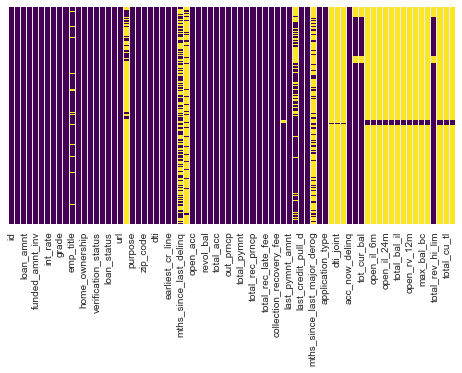

In [9]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(loandata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
null_cols = ['desc',
             'mths_since_last_delinq',
             'mths_since_last_record',
             'next_pymnt_d',
             'mths_since_last_major_derog',
             'annual_inc_joint',
             'dti_joint',
             'verification_status_joint',
             'open_acc_6m',
             'open_il_6m',
             'open_il_12m',
             'open_il_24m',
             'mths_since_rcnt_il',
             'total_bal_il',
             'il_util',
             'open_rv_12m',
             'open_rv_24m',
             'max_bal_bc',
             'all_util',
             'inq_fi',
             'total_cu_tl',
             'inq_last_12m'
             ]


def drop_null_columns(data):
    """Drop columns (most of values are null)"""
    data.drop(null_cols, axis=1, inplace=True)
    return None

drop_null_columns(loandata)

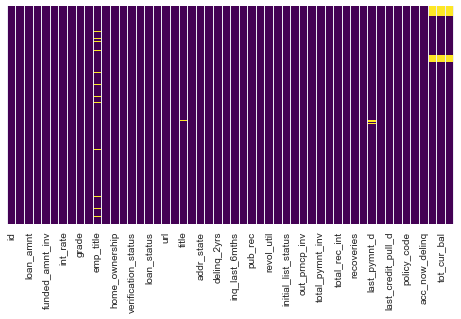

In [6]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(loandata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

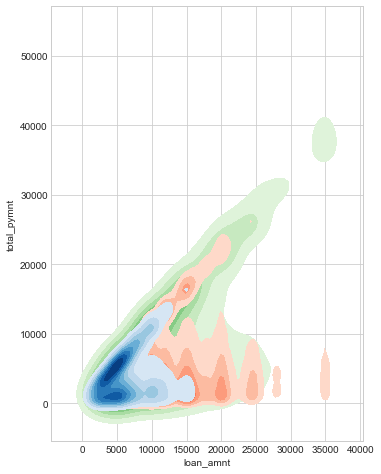

In [3]:
# Subset the loan data set dataset by purpose
Creditcard = loandata.query("purpose == 'credit_card'")
Car = loandata.query("purpose == 'car'")
House = loandata.query("purpose == 'house'")

f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ax = sns.kdeplot(House.loan_amnt, House.total_pymnt,
                 cmap="Greens", shade=True, shade_lowest=False)
ax = sns.kdeplot(Creditcard.loan_amnt, Creditcard.total_pymnt,cmap="Reds", shade=True, shade_lowest=False)

ax = sns.kdeplot(Car.loan_amnt, Car.total_pymnt,
                 cmap="Blues", shade=True, shade_lowest=False)


# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]

In [11]:
loandata.loan_status.unique()


array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [13]:
#default = loandata.query("loan_status == 'Default'")
statuslist = ['Fully Paid', 'Charged Off','Default', 
              'issued','Late (16-30 days)', 'Late (31-120 days)', 'Current', 'In Grace Period'];
loandata = loandata.query("loan_status in @statuslist")

In [14]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876170 entries, 0 to 887378
Data columns (total 52 columns):
id                            876170 non-null int64
member_id                     876170 non-null int64
loan_amnt                     876170 non-null float64
funded_amnt                   876170 non-null float64
funded_amnt_inv               876170 non-null float64
term                          876170 non-null object
int_rate                      876170 non-null float64
installment                   876170 non-null float64
grade                         876170 non-null object
sub_grade                     876170 non-null object
emp_title                     825508 non-null object
emp_length                    876170 non-null object
home_ownership                876170 non-null object
annual_inc                    876170 non-null float64
verification_status           876170 non-null object
issue_d                       876170 non-null object
loan_status                   876170 

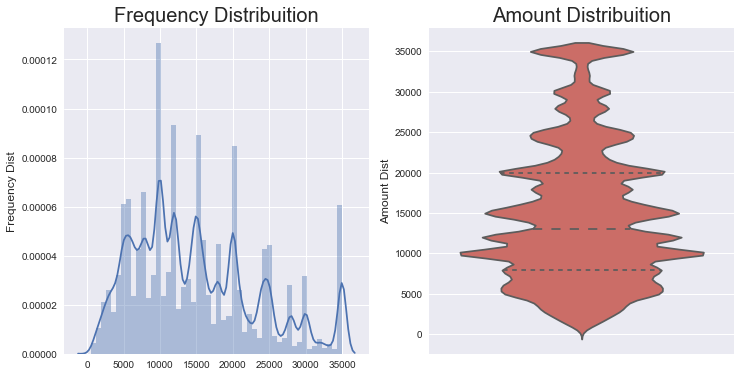

In [15]:
#lets analyse loan_amnt data
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(loandata["loan_amnt"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=loandata, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

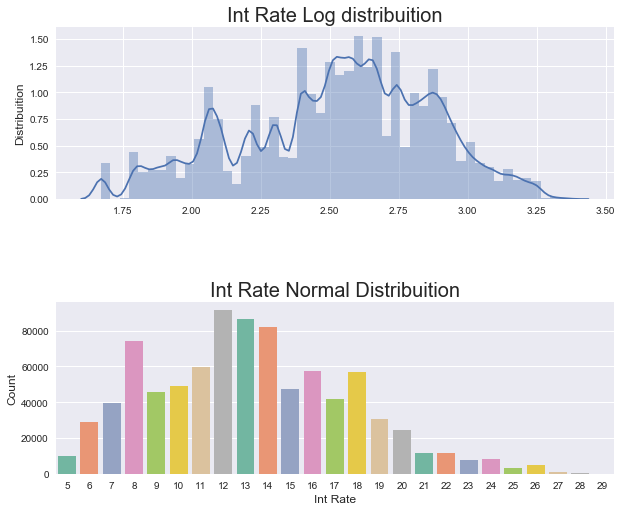

In [16]:
loandata['int_round'] = loandata['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(loandata["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=loandata, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()


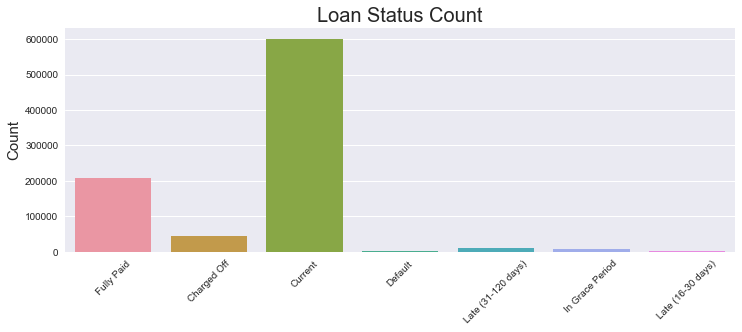

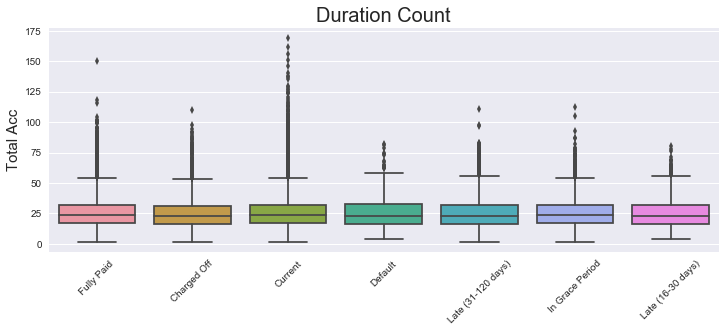

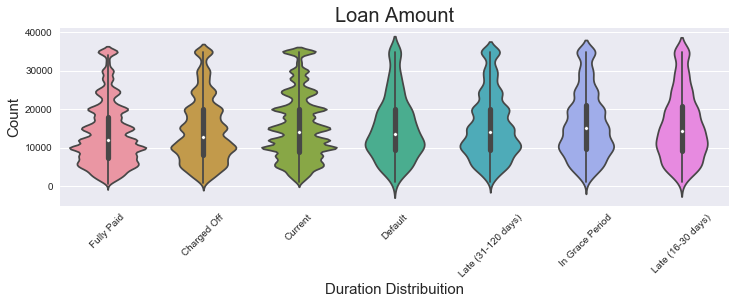

In [17]:
plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=loandata)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)
plt.figure(figsize = (12,14))
plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="total_acc", data=loandata)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Total Acc", fontsize=15)
g1.set_title("Duration Count", fontsize=20)
plt.figure(figsize = (12,14))
plt.subplot(313)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=loandata)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()


In [18]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loandata[purp_loan[0]], loandata[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,
car,448,4937,10,3198,40,15,70
credit_card,7826,149835,233,42250,1150,381,2096
debt_consolidation,27599,356239,790,120764,3998,1510,7419
educational,56,1,0,269,0,0,0
home_improvement,2269,34980,47,12660,367,137,662
house,286,1854,7,1366,37,15,61
major_purchase,874,10308,14,5391,125,51,207
medical,569,5324,15,2285,56,17,125
moving,425,3121,11,1603,43,23,90


In [19]:
#Exploring the loan_status x Application_type
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loandata[loan_application[0]], loandata[loan_application[1]]).style.background_gradient(cmap = cm)


application_type,INDIVIDUAL,JOINT
loan_status,,
Charged Off,45248,0
Current,601338,441
Default,1219,0
Fully Paid,207722,1
In Grace Period,6250,3
Late (16-30 days),2357,0
Late (31-120 days),11589,2


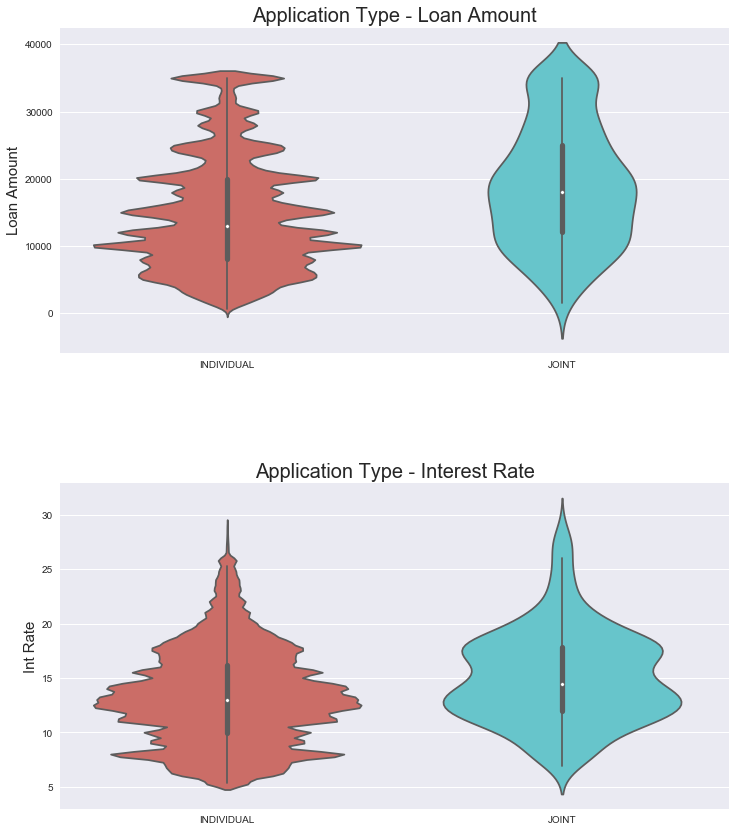

In [20]:

plt.figure(figsize = (12,14))
#The amount and int rate x application_type 
plt.subplot(211)
g = sns.violinplot(x="application_type", y="loan_amnt",data=loandata, 
            palette="hls")
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="application_type", y="int_rate",data=loandata,
               palette="hls")
g1.set_title("Application Type - Interest Rate", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Int Rate", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

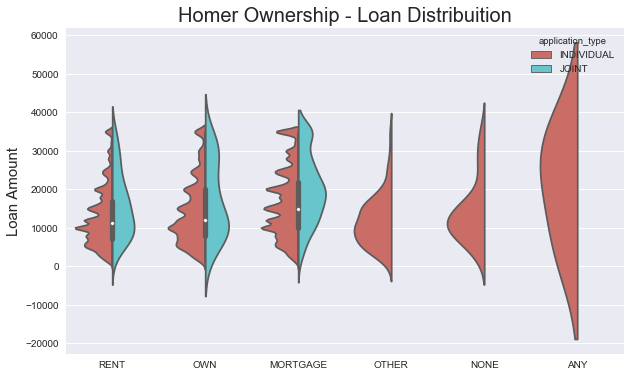

In [21]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="home_ownership",y="loan_amnt",data=loandata,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.show()


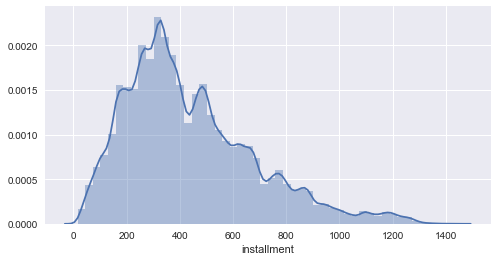

In [22]:
sns.distplot(loandata['installment'])
plt.show()

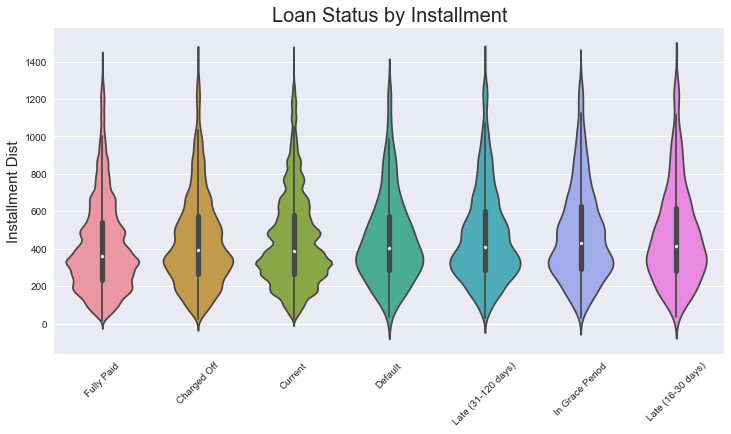

In [23]:
plt.figure(figsize = (12,6))

g = sns.violinplot(x='loan_status', y="installment",
                   data=loandata)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Installment Dist", fontsize=15)
g.set_title("Loan Status by Installment", fontsize=20)

plt.show()

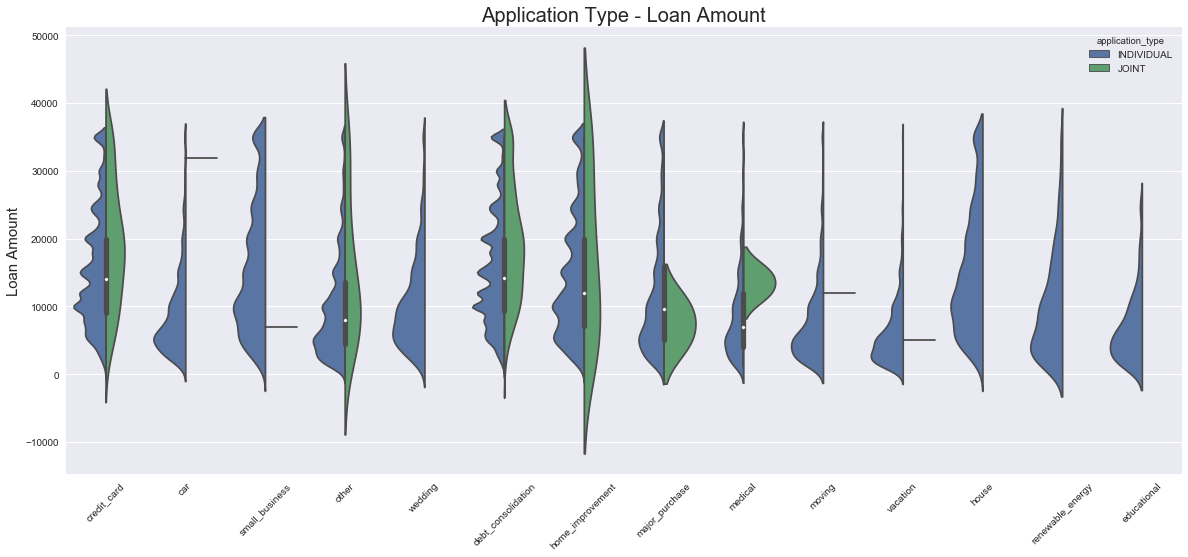

In [24]:
# Now will start exploring the Purpose variable

plt.figure(figsize = (20,8))

g1 = sns.violinplot(x="purpose",y="loan_amnt",data=loandata,
               hue="application_type", split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Application Type - Loan Amount", fontsize=20)
g1.set_xlabel("", fontsize=25)
g1.set_ylabel("Loan Amount", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)
plt.show()


In [25]:

#Exploring the State Adress x Loan Status
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loandata[adress_loan[0]], loandata[adress_loan[1]]).style.background_gradient(cmap = cm)


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
addr_state,,,,,,,
AK,96,1469,2,567,15,6,31
AL,662,7576,9,2485,111,43,160
AR,337,4637,8,1417,57,13,86
AZ,1049,13577,39,5028,143,50,282
CA,7332,81851,211,35778,906,327,1641
CO,784,12573,25,4829,106,57,202
CT,614,9353,8,3067,126,29,133
DC,87,1543,2,750,10,0,17
DE,121,1730,5,546,21,7,31


In [26]:
loandata.emp_title.value_counts().head()

Teacher             13261
Manager             11091
Registered Nurse     5468
RN                   5298
Owner                5276
Name: emp_title, dtype: int64

In [27]:
loandata.emp_length.value_counts()

10+ years    288282
2 years       77818
< 1 year      69360
3 years       69078
1 year        56199
5 years       55022
4 years       51835
7 years       44229
n/a           44160
8 years       43420
6 years       42485
9 years       34282
Name: emp_length, dtype: int64

Text(0.5,1,'Loan Count by length of employment')

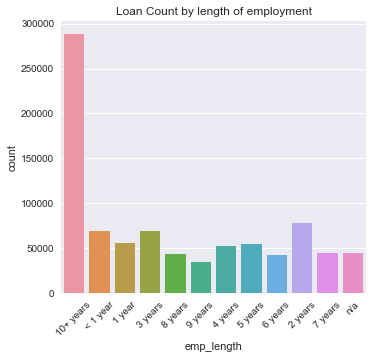

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loandata["emp_length"])
plt.xticks(rotation=45)
plt.title('Loan Count by length of employment')

In [29]:
loandata.home_ownership.value_counts()

MORTGAGE    438081
RENT        351652
OWN          86245
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

Text(0.5,1,'Loan Count by Home Ownership')

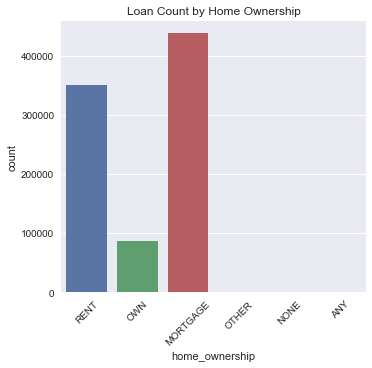

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loandata["home_ownership"])
plt.xticks(rotation=45)
plt.title('Loan Count by Home Ownership')

In [31]:
loandata.issue_d.value_counts().head()

Oct-2015    48631
Jul-2015    45962
Oct-2014    38782
Nov-2015    37530
Aug-2015    35886
Name: issue_d, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text xticklabel objects>)

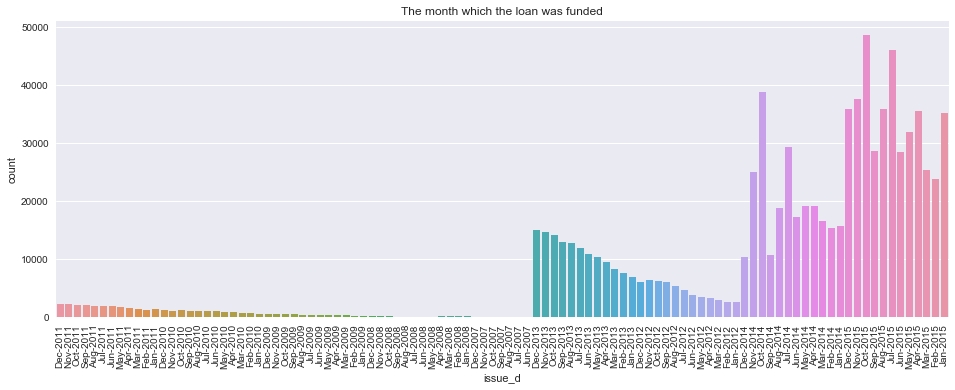

In [32]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.title('The month which the loan was funded')
sns.countplot(loandata["issue_d"])
plt.xticks(rotation='vertical')

In [33]:
loandata.pub_rec.isnull().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

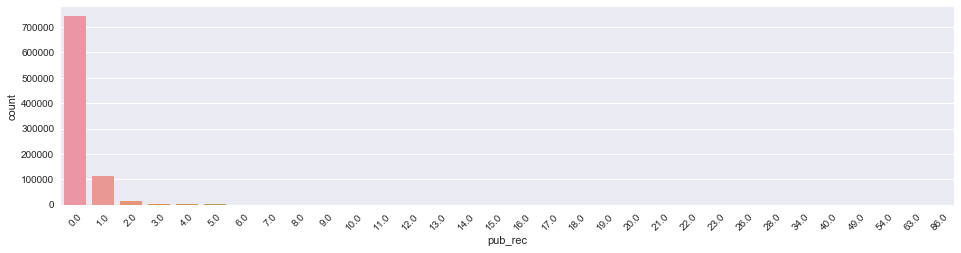

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(loandata["pub_rec"])
plt.xticks(rotation=45)

In [36]:
WillDefault = ['Charged Off',
             'Does not meet the credit policy. Status:Charged Off',
             'Default',
               'Late (31-120 days)',
                 'Late (16-30 days)',
                 'In Grace Period'
             ]

WillNotDefault = ['Fully Paid',
                   'Does not meet the credit policy. Status:Fully Paid'
              ]


In [37]:
def categorize_target(data):
    """Returns encoded loan status: Safe, Warning and Bad"""

    def func(x):
        if x['loan_status'] in WillDefault:
            return 1
        elif x['loan_status'] in WillNotDefault:
            return 0
       

    data['loan_status_coded'] = data.apply(func, axis=1)
    data.drop('loan_status', axis=1, inplace=True)
    return data

def categorize_term(data):
    """Returns encoded loan status: Safe, Warning and Bad"""

    def func(x):
        if x['term'] in '36 months':
            return 36
        elif x['term'] in '60 months':
            return 60
       

    data['term_coded'] = data.apply(func, axis=1)
    data.drop('term', axis=1, inplace=True)
    return data

def categorize_purpose(data):
    """Returns encoded loan status: Safe, Warning and Bad"""

    def func(x):
        
        if x['purpose'] in 'credit_card':
            return 1
        elif x['purpose'] in 'car':
            return 2
        elif x['purpose'] in 'small_business':
            return 3
        elif x['purpose'] in 'wedding':
            return 4
        elif x['purpose'] in 'debt_consolidation':
            return 5
        elif x['purpose'] in 'home_improvement':
            return 6
        elif x['purpose'] in 'major_purchase':
            return 7
        elif x['purpose'] in 'medical':
            return 8
        elif x['purpose'] in 'moving':
            return 9
        elif x['purpose'] in 'vacation':
            return 10
        elif x['purpose'] in 'house':
            return 11
        elif x['purpose'] in 'renewable_energy':
            return 12
        elif x['purpose'] in 'educational':
            return 13

    data['purpose_coded'] = data.apply(func, axis=1)
    data.drop('purpose', axis=1, inplace=True)
    return data

In [38]:
loan_data = categorize_term(loandata)

In [39]:
loan_data = categorize_purpose(loandata)

In [40]:
loan_data = categorize_target(loandata)


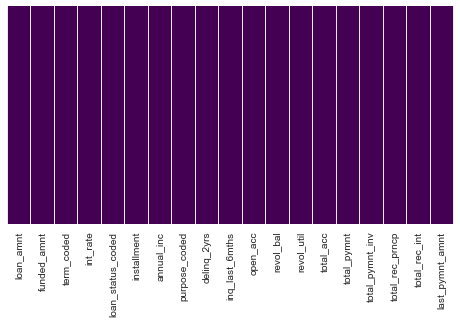

In [41]:
# Prepare Feature List
loan_data = loandata[[ 'loan_amnt', 'funded_amnt',  'term_coded', 'int_rate','loan_status_coded',
            'installment',  
            'annual_inc',  'purpose_coded', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
            'total_acc',  'total_pymnt', 'total_pymnt_inv',
            'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']]
loan_data = loan_data.fillna(value = 0)
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
#loan_data.drop('initial_list_status', axis=1, inplace=True)

In [44]:
loan_data.head()

,loan_amnt,funded_amnt,term_coded,int_rate,loan_status_coded,installment,annual_inc,purpose_coded,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000.0,5000.0,0,10.65,0.0,162.87,24000.0,1.0,0.0,1.0,3.0,13648.0,83.7,9.0,5861.071414,5831.78,5000.00,861.07,171.62
1,2500.0,2500.0,0,15.27,1.0,59.83,30000.0,1.0,0.0,5.0,3.0,1687.0,9.4,4.0,1008.710000,1008.71,456.46,435.17,119.66
2,2400.0,2400.0,0,15.96,0.0,84.33,12252.0,3.0,0.0,2.0,2.0,2956.0,98.5,10.0,3003.653644,3003.65,2400.00,603.65,649.91
3,10000.0,10000.0,0,13.49,0.0,339.31,49200.0,0.0,0.0,1.0,10.0,5598.0,21.0,37.0,12226.302212,12226.30,10000.00,2209.33,357.48
4,3000.0,3000.0,0,12.69,0.0,67.79,80000.0,0.0,0.0,0.0,15.0,27783.0,53.9,38.0,3242.170000,3242.17,2233.10,1009.07,67.79


In [45]:
def train_test_split(data):
    train= data.sample(frac=0.8)
    test= data.drop(train.index)
    return train,test
    
def X_y_split(data, label):
    y = data[label]
    X = data.drop(label, axis=1)
    return X,y

def misclassification_rate(prediction, observed):
    diff = list(prediction - observed)
    return 1 - diff.count(0) / len(diff)


In [46]:
# loandata['defaulted'] = loandata.apply(lambda x : 1 if x.loan_status == 'Default' else 0, axis=1  )

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=loan_data.drop('loan_status_coded',axis=1)
y=loan_data['loan_status_coded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [48]:
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (613319, 18)
Shape of y_train:  (613319,)
Shape of x_test:  (262851, 18)
Shape of y_test:  (262851,)


In [49]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

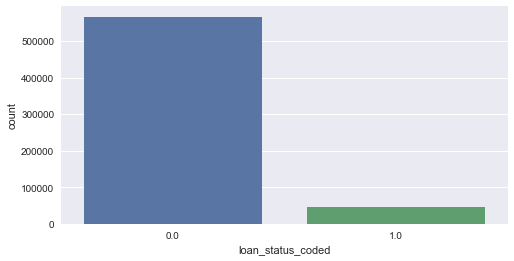

In [50]:
sns.countplot(y_train)

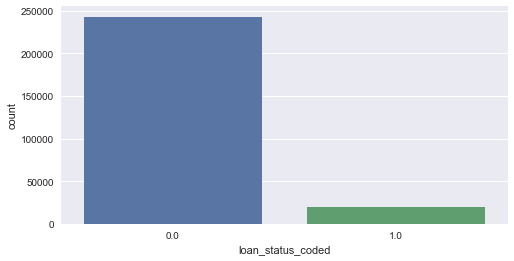

In [51]:
sns.countplot(y_test)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97    242907
        1.0       0.97      0.34      0.50     19944

avg / total       0.95      0.95      0.94    262851



In [54]:
out_sample_err = 1 - logmodel.score(X_test,y_test)
print(out_sample_err)

0.050796839274


In [55]:
from sklearn.metrics import confusion_matrix

lg_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = logmodel.predict(X_test))
print("The Confusion matrix:\n", lg_confusion_matrix)

The Confusion matrix:
 [[242691    216]
 [ 13136   6808]]


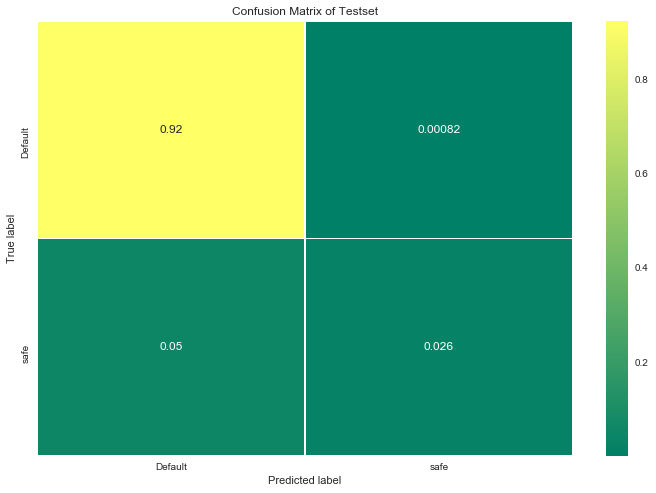

In [56]:
# Plot normalized confusion matrix
cf_mat_p = lg_confusion_matrix/lg_confusion_matrix.sum()


import matplotlib.cm as cm
plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, 
            cmap=cm.summer,
            xticklabels=['Default','safe'], 
            yticklabels=['Default','safe'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of Testset")
plt.show()